# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint
# regressions
from scipy.stats import linregress

# Import API key
from api_keys_Booth import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
cities[0:5]

['elk city', 'price', 'georgiyevskoye', 'plettenberg bay', 'umzimvubu']

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:
 # Build query URL and request your results in Celsius
city = "kodiak"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
print(weather_response.status_code)
weather_json = weather_response.json()

200


In [7]:
type(weather_json)

dict

In [8]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [9]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 57.79, 'lon': -152.4072},
 'dt': 1644075584,
 'id': 5866583,
 'main': {'feels_like': 32.27,
          'humidity': 75,
          'pressure': 998,
          'temp': 36.91,
          'temp_max': 36.91,
          'temp_min': 36.91},
 'name': 'Saint Paul Harbor',
 'sys': {'country': 'US',
         'id': 7668,
         'sunrise': 1644084198,
         'sunset': 1644115442,
         'type': 1},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 5.75}}


In [10]:
lat = weather_json["coord"]["lat"]
lng = weather_json["coord"]["lon"]
country = weather_json["sys"]["country"]
cloudiness = weather_json["clouds"]["all"]

date_dt = weather_json["dt"]
city_name = weather_json["name"]
wind = weather_json["wind"]["speed"]

temp = weather_json["main"]['temp']
pressure = weather_json["main"]['pressure']
humidity = weather_json["main"]['humidity']

In [11]:
pressure

998

In [12]:
cities[-10:]

['sattahip',
 'vao',
 'natchitoches',
 'orcopampa',
 'ruatoria',
 'turayf',
 'troitskoye',
 'cockburn town',
 'ambovombe',
 'linqiong']

In [13]:
650/60

10.833333333333334

In [14]:
lats = []
lngs = []
countries = []
clouds = []
dates = []
names = []
winds = []
temps = []
pressures = []
humids = []

for city in cities[0:60]:
    
    # make request
    print(city)
    
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    print(weather_response.status_code)
    print()
    
    try:
        # get data
        weather_json = weather_response.json()

        # parse the data
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        country = weather_json["sys"]["country"]
        cloudiness = weather_json["clouds"]["all"]

        date_dt = weather_json["dt"]
        city_name = weather_json["name"]
        wind = weather_json["wind"]["speed"]

        temp = weather_json["main"]['temp']
        pressure = weather_json["main"]['pressure']
        humidity = weather_json["main"]['humidity']

        # slap into lists
        lats.append(lat)
        lngs.append(lng)
        countries.append(country)
        clouds.append(cloudiness)
        dates.append(date_dt)
        names.append(city_name)
        winds.append(wind)
        temps.append(temp)
        pressures.append(pressure)
        humids.append(humidity)
            
    except Exception as e:
        print(e)
        
        # slap into lists
        lats.append(np.nan)
        lngs.append(np.nan)
        countries.append(None)
        clouds.append(np.nan)
        dates.append(np.nan)
        names.append(city)
        winds.append(np.nan)
        temps.append(np.nan)
        pressures.append(np.nan)
        humids.append(np.nan)
        
    time.sleep(1)

elk city
200

price
200

georgiyevskoye
200

plettenberg bay
200

umzimvubu
404

'coord'
yellowknife
200

dukat
200

mahon
200

te anau
200

hilo
200

esperance
200

jamestown
200

havelock
200

izmit
200

kahului
200

bethel
200

hermanus
200

new norfolk
200

morristown
200

hithadhoo
200

nizhneyansk
404

'coord'
husavik
200

san patricio
200

puerto maldonado
200

pangai
200

vilaka
200

villarrica
200

sorland
200

illoqqortoormiut
404

'coord'
lazaro cardenas
200

busselton
200

bluff
200

rikitea
200

tasiilaq
200

ushuaia
200

puerto ayora
200

pisco
200

cayenne
200

mataura
200

flagstaff
200

cape town
200

kaitangata
200

bredasdorp
200

key largo
200

shenzhen
200

ribeira grande
200

talnakh
200

upernavik
200

cabo san lucas
200

skibbereen
200

abu dhabi
200

zhigansk
200

khatanga
200

seymchan
200

georgetown
200

geraldton
200

sinkat
404

'coord'
villa oliva
404

'coord'
bandarbeyla
200

vaini
200



In [72]:
df = pd.DataFrame()

df["City"] = names
df["Country"] = countries
df["Latitude"] = lats
df["Longitude"] = lngs
df["Date"] = dates
df["Wind_Speed"] = winds
df["Pressure"] = pressures
df["Humidity"] = humids
df["Temperature"] = temps
df["Cloudiness"] = clouds

df.head(190)

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Elk City,US,35.4120,-99.4043,1.644076e+09,9.22,1030.0,59.0,26.92,0.0
1,Price,US,39.5994,-110.8107,1.644076e+09,3.44,1028.0,73.0,16.54,0.0
2,Georgiyevskoye,RU,58.7310,45.0240,1.644076e+09,5.84,1012.0,95.0,11.73,77.0
3,Plettenberg Bay,ZA,-34.0527,23.3716,1.644076e+09,23.44,1016.0,76.0,72.48,2.0
4,umzimvubu,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Yellowknife,CA,62.4560,-114.3525,1.644076e+09,9.22,1022.0,83.0,-15.30,75.0
6,Dukat,RU,62.5500,155.5500,1.644076e+09,2.19,1023.0,75.0,-22.49,3.0
7,Mahon,ES,39.8885,4.2658,1.644076e+09,9.22,1024.0,71.0,55.96,75.0
8,Te Anau,NZ,-45.4167,167.7167,1.644076e+09,2.42,1020.0,94.0,40.42,15.0
9,Hilo,US,19.7297,-155.0900,1.644075e+09,8.05,1018.0,92.0,68.22,100.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         60 non-null     object 
 1   Country      55 non-null     object 
 2   Latitude     55 non-null     float64
 3   Longitude    55 non-null     float64
 4   Date         55 non-null     float64
 5   Wind_Speed   55 non-null     float64
 6   Pressure     55 non-null     float64
 7   Humidity     55 non-null     float64
 8   Temperature  55 non-null     float64
 9   Cloudiness   55 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.8+ KB


In [74]:
df.to_csv("my_data.csv", index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         60 non-null     object 
 1   Country      55 non-null     object 
 2   Latitude     55 non-null     float64
 3   Longitude    55 non-null     float64
 4   Date         55 non-null     float64
 5   Wind_Speed   55 non-null     float64
 6   Pressure     55 non-null     float64
 7   Humidity     55 non-null     float64
 8   Temperature  55 non-null     float64
dtypes: float64(7), object(2)
memory usage: 4.3+ KB


In [19]:
#  Get the indices of cities that have humidity over 100%.
df.describe()

,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature
count,55.000000,55.000000,5.500000e+01,55.000000,55.000000,55.000000,55.000000
mean,14.332105,-1.962249,1.644076e+09,8.468727,1015.363636,76.400000,46.453091
std,39.797523,102.802710,8.927400e+01,7.470146,11.952628,16.776968,34.000188
min,-54.800000,-175.200000,1.644075e+09,0.000000,965.000000,41.000000,-40.320000
25%,-24.435150,-81.871100,1.644076e+09,3.430000,1010.500000,66.500000,26.875000
50%,22.545500,-9.266700,1.644076e+09,6.260000,1016.000000,77.000000,57.970000
75%,41.734100,94.366300,1.644076e+09,9.820000,1022.000000,91.500000,72.600000
max,72.786800,169.846400,1.644076e+09,31.090000,1037.000000,100.000000,86.400000


In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

mask = df.Humidity <= 100
df_sub = df.loc[mask].dropna().reset_index(drop=True)

In [22]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         55 non-null     object 
 1   Country      55 non-null     object 
 2   Latitude     55 non-null     float64
 3   Longitude    55 non-null     float64
 4   Date         55 non-null     float64
 5   Wind_Speed   55 non-null     float64
 6   Pressure     55 non-null     float64
 7   Humidity     55 non-null     float64
 8   Temperature  55 non-null     float64
dtypes: float64(7), object(2)
memory usage: 4.0+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

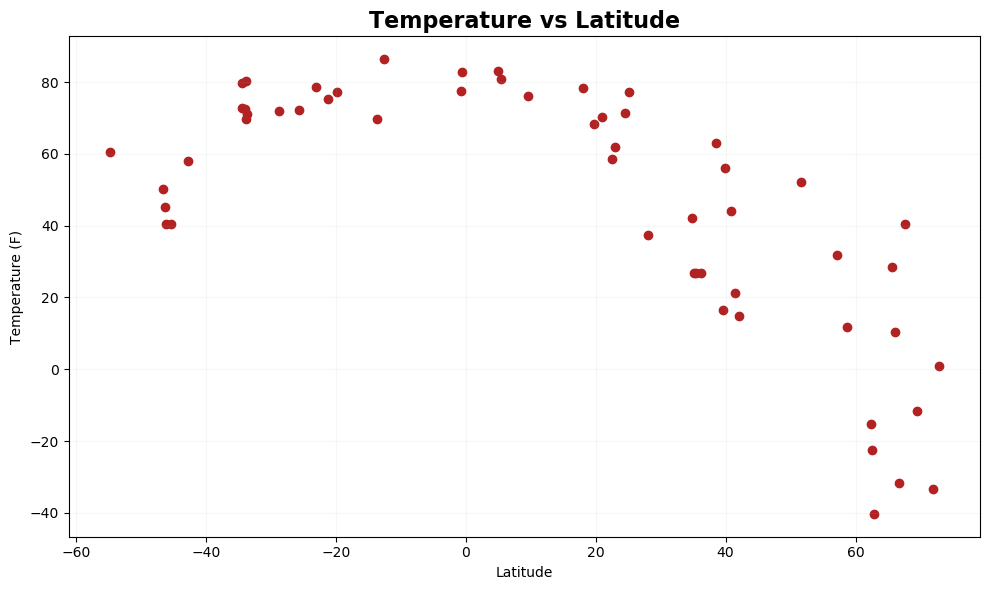

In [34]:
plt.figure(figsize=(10,6))

plt.scatter(df_sub.Latitude, df_sub.Temperature, color="firebrick")

plt.title("Temperature vs Latitude", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("temp_lat_booth.png")
plt.show()

## Latitude vs. Humidity Plot

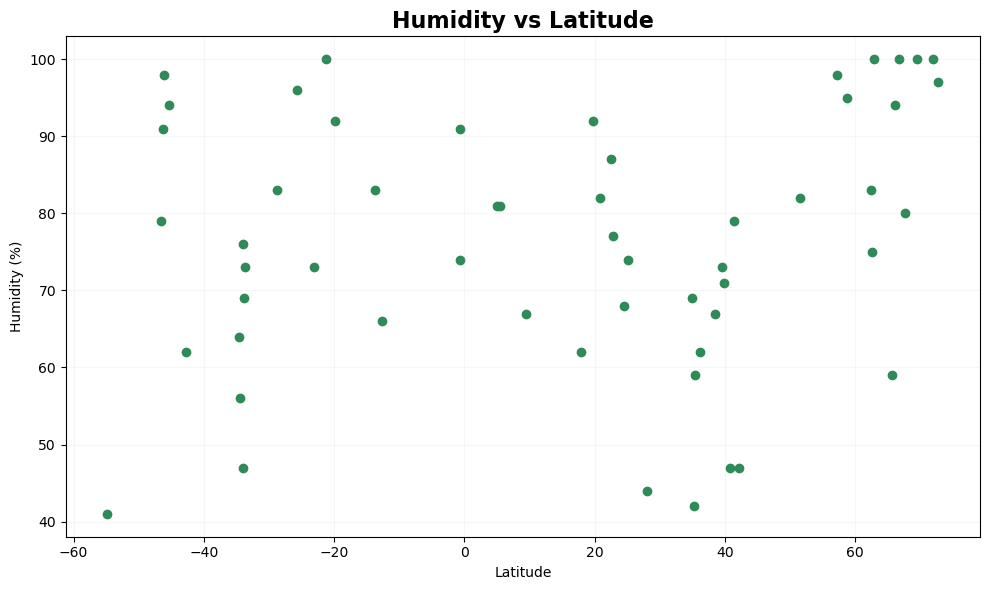

In [35]:
plt.figure(figsize=(10,6))

plt.scatter(df_sub.Latitude, df_sub.Humidity, color="seagreen")

plt.title("Humidity vs Latitude", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("humid_lat_booth.png")
plt.show()

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [40]:
# linear modelling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [37]:
df_north = df_sub.loc[df_sub.Latitude >= 0]
df_south = df_sub.loc[df_sub.Latitude < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


The r-squared is: 0.702021880111591


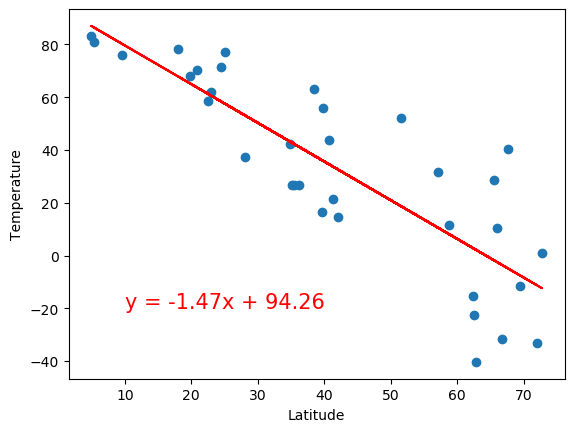

In [38]:
# Print out the r-squared value along with the plot.
x_values = df_north['Latitude']
y_values = df_north['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [39]:
feature = df_north[["Latitude"]]
target = df_north["Temperature"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     75.39
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           6.37e-10
Time:                        09:52:44   Log-Likelihood:                -148.90
No. Observations:                  34   AIC:                             301.8
Df Residuals:                      32   BIC:                             304.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.2649      7.837     12.028      0.000      78.301     110.228
Latitude      -1.4655      0.169     -8.683      0.000      -1.809      -1.122
==============================================================================
Omnibus:                        0.295   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.399
Skew:                           0.195   Prob(JB):                        0.819
Kurtosis:                       2.641   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-1.46552809]
94.26488626873345


In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [50]:
actual = df_north["Temperature"]
predictions = reg.predict(df_north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.7020218801115905
MSE: 372.8624568977404
RMSE: 19.30964673156245
MAE: 15.791200907028674


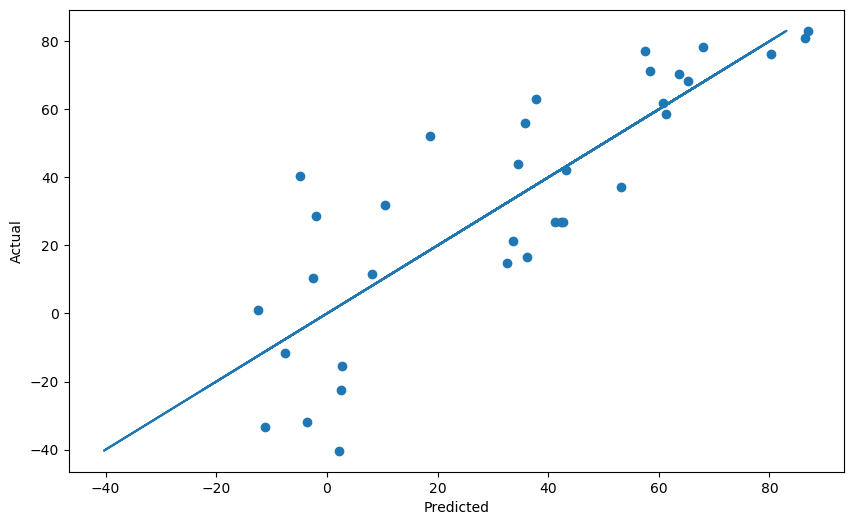

In [53]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual)
plt.plot(actual, actual)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

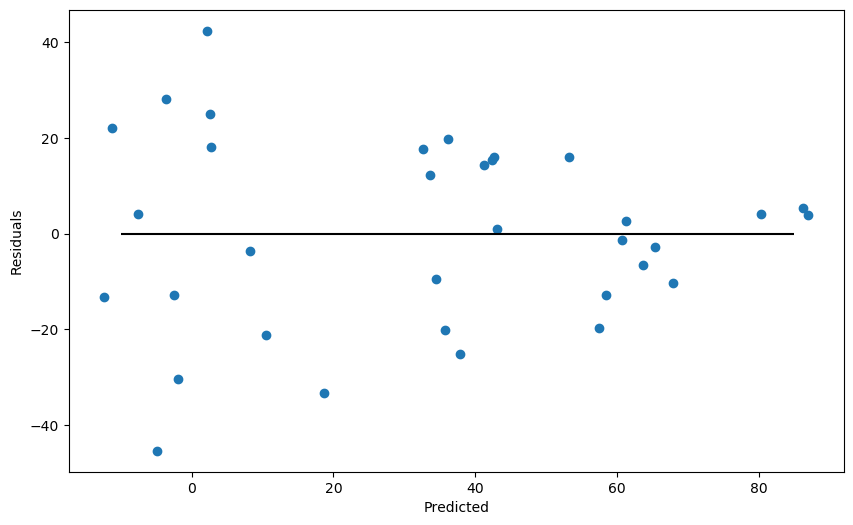

In [59]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals)
plt.hlines(0, -10, 85)

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

# Heteroscedasticity! 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1727223998645063


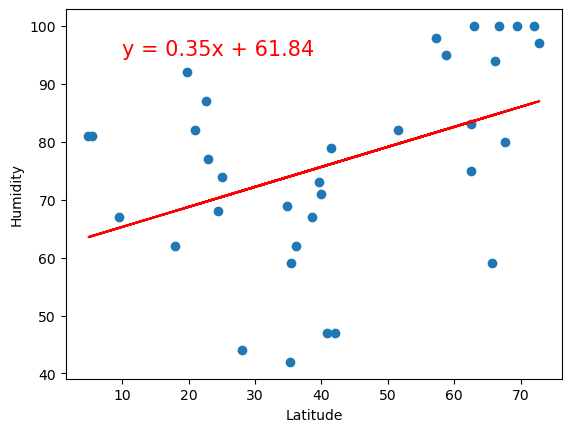

In [63]:
# Print out the r-squared value along with the plot.
x_values = df_north['Latitude']
y_values = df_north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [64]:
feature = df_north[["Latitude"]]
target = df_north["Humidity"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     6.681
Date:                Sat, 05 Feb 2022   Prob (F-statistic):             0.0145
Time:                        10:10:08   Log-Likelihood:                -141.01
No. Observations:                  34   AIC:                             286.0
Df Residuals:                      32   BIC:                             289.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.8383      6.213      9.953      0.000      49.183      74.494
Latitude       0.3459      0.134      2.585      0.015       0.073       0.618
==============================================================================
Omnibus:                        2.898   Durbin-Watson:                   2.460
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.617
Skew:                          -0.612   Prob(JB):                        0.270
Kurtosis:                       2.409   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.34586656]
61.838300297282714


In [67]:
actual = df_north["Humidity"]
predictions = reg.predict(df_north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.17272239986450633
MSE: 234.33997736156422
RMSE: 15.308167015079377
MAE: 12.564320061669127


C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


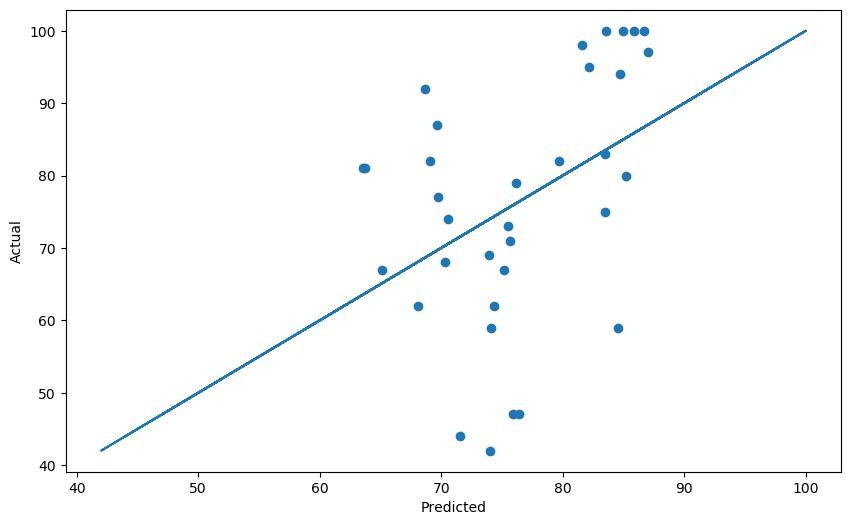

In [68]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual)
plt.plot(actual, actual)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

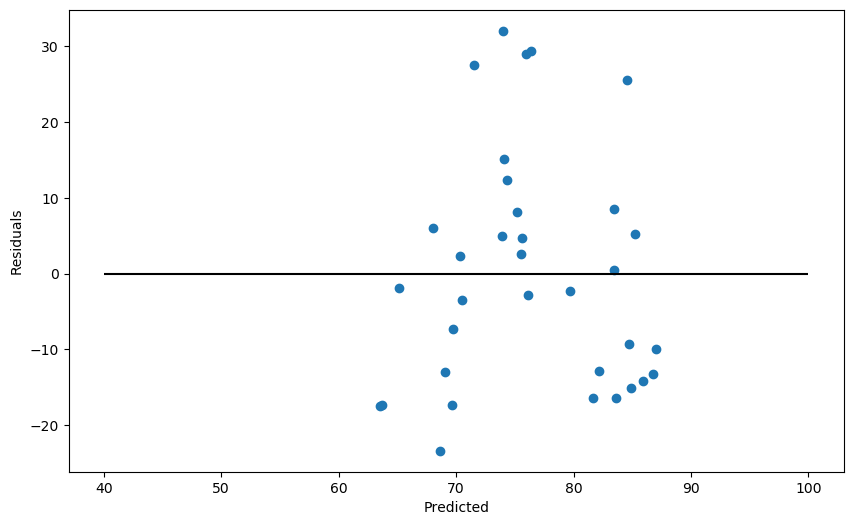

In [71]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals)
plt.hlines(0, 40, 100)

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression